Grid Approximation

https://www.youtube.com/watch?v=YPV8OhxVKLM

In [3]:
country.code <- 'us'  # use yours
url.pattern <- 'https://'  # use http if you want
repo.data.frame <- subset(getCRANmirrors(), CountryCode == country.code & grepl(url.pattern, URL))
options(repos = repo.data.frame$URL)

In [4]:
install.packages(c("coda", "mvtnorm", "devtools"))

also installing the dependencies ‘memoise’, ‘whisker’, ‘rstudioapi’, ‘git2r’, ‘withr’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
library(devtools)

In [26]:
install.packages("BiocInstaller", repos="http://bioconductor.org/packages/2.13/bioc")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [27]:
devtools::install_github("rmcelreath/rethinking")

from URL https://api.github.com/repos/rmcelreath/rethinking/zipball/master
Installing rethinking
Installing loo
Installing matrixStats
'/Users/maestro/anaconda/lib/R/bin/R' --no-site-file --no-environ --no-save  \
  --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/z9/r9f6fqx111v77hrzftrq0v4w0000gn/T/RtmpwaT0nX/devtools4901d031f0/matrixStats'  \
  --library='/Users/maestro/anaconda/lib/R/library' --install-tests 

'/Users/maestro/anaconda/lib/R/bin/R' --no-site-file --no-environ --no-save  \
  --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/z9/r9f6fqx111v77hrzftrq0v4w0000gn/T/RtmpwaT0nX/devtools49052a1cff6/loo'  \
  --library='/Users/maestro/anaconda/lib/R/library' --install-tests 

Installing rstan
Installing gridExtra
'/Users/maestro/anaconda/lib/R/bin/R' --no-site-file --no-environ --no-save  \
  --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/z9/r9f6fqx111v77hrzftrq0v4w0000gn/T/RtmpwaT0nX/devtools4905b80157b/gridExtra'  \
  --library='/Users/maestr

In [28]:
library(rethinking)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.12.1, packaged: 2016-09-11 13:07:50 UTC, GitRev: 85f7a56811da)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.59)


In [ ]:
p_grid <- seq(from=0, to=1, length.out = 1000)

In [ ]:
prior <- rep(1,1000)

In [ ]:
likelihood <- dbinom(6, size=9, prob=p_grid)

In [ ]:
posterior <- likelihood * prior

In [ ]:
posterior <- posterior / sum(posterior)

In [ ]:
samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)

In [ ]:
plot(samples)

In [ ]:
library(ggplot2)

In [ ]:
qplot(seq_along(samples), samples)

In [ ]:
x <- seq_along(samples)
data <- data.frame(x,samples)

In [ ]:
head(data)

In [ ]:
ggplot(data, aes(samples)) + geom_histogram(binwidth = 0.01, aes(y=..density..)) 

In [ ]:
sum(samples < 0.5) / 1e4

In [ ]:
sum(samples > 0.5 & samples < 0.75) / 1e4

In [ ]:
quantile(samples, 0.8)

In [ ]:
p_grid <- seq(from=0, to=1, length.out = 1000)
prior <- rep(1, 1000)
likelihood <-dbinom(3, 3, prob=p_grid)
posterior <- prior * likelihood
posterior <- posterior / sum(posterior)
samples <- sample(p_grid, size=1e4, replace=TRUE, prob=posterior)

In [ ]:
help(quantile)

Producing central 50% probability

In [ ]:
quantile(samples, c(0.25, 0.75))

In [ ]:
install.packages('coda')

In [ ]:
library(coda)

In [ ]:
help(as.mcmc)

In [ ]:
HPDinterval(as.mcmc(samples), prob=0.5)

In [ ]:
help(HPDinterval)

In [ ]:
p_grid[which.max(posterior)]

In [ ]:
which.max(posterior)

In [ ]:
mean(samples)

In [ ]:
median(samples)

In [29]:
data(Howell1)
d<-Howell1

In [30]:
str(d)

'data.frame':	544 obs. of  4 variables:
 $ height: num  152 140 137 157 145 ...
 $ weight: num  47.8 36.5 31.9 53 41.3 ...
 $ age   : num  63 63 65 41 51 35 32 27 19 54 ...
 $ male  : int  1 0 0 1 0 1 0 1 0 1 ...


In [31]:
d2 <- d[ d$age >=18, ]

In [32]:
mu.list <-seq( from=140, to=160, length.out=200)
sigma.list <- seq(from=4, to=9, length.out=200)

In [33]:
post <- expand.grid(mu=mu.list, sigma=sigma.list)

In [34]:
post$LL <- sapply(1:nrow(post), function(i) sum(dnorm(
                                                d2$height,
                                                mean=post$mu[i],
                                                sd=post$sigma[i],
                                                log=TRUE)))

In [35]:
post$prod <- post$LL + dnorm(post$mu, 178, 20, TRUE) + dunif(post$sigma, 0, 50, TRUE)

In [36]:
post$prob <- exp(post$prod - max(post$prod))

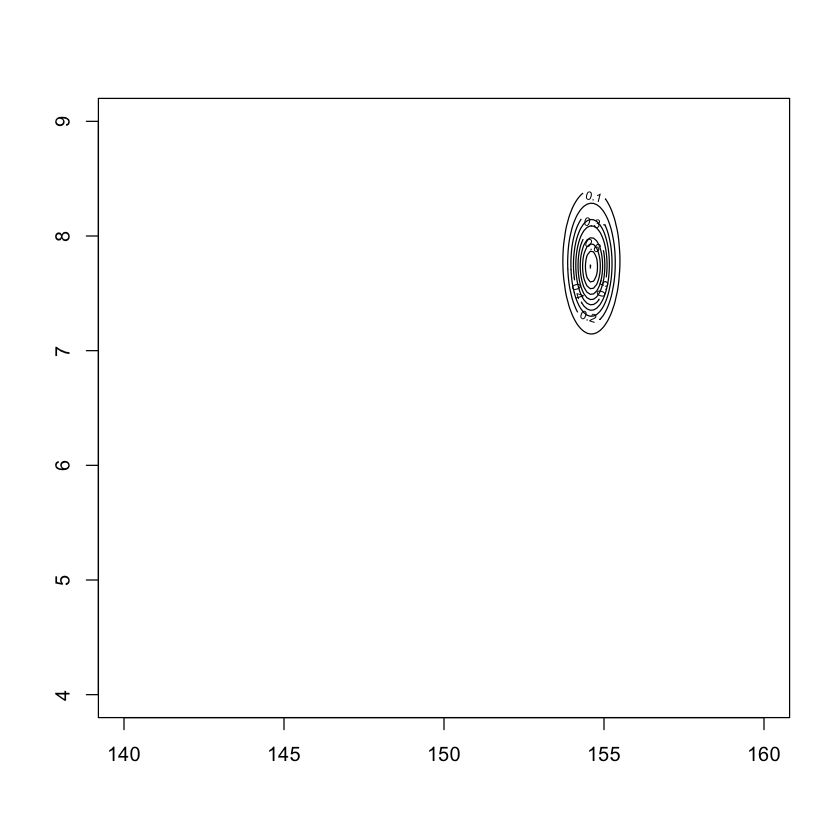

In [37]:
contour_xyz(post$mu, post$sigma, post$prob)

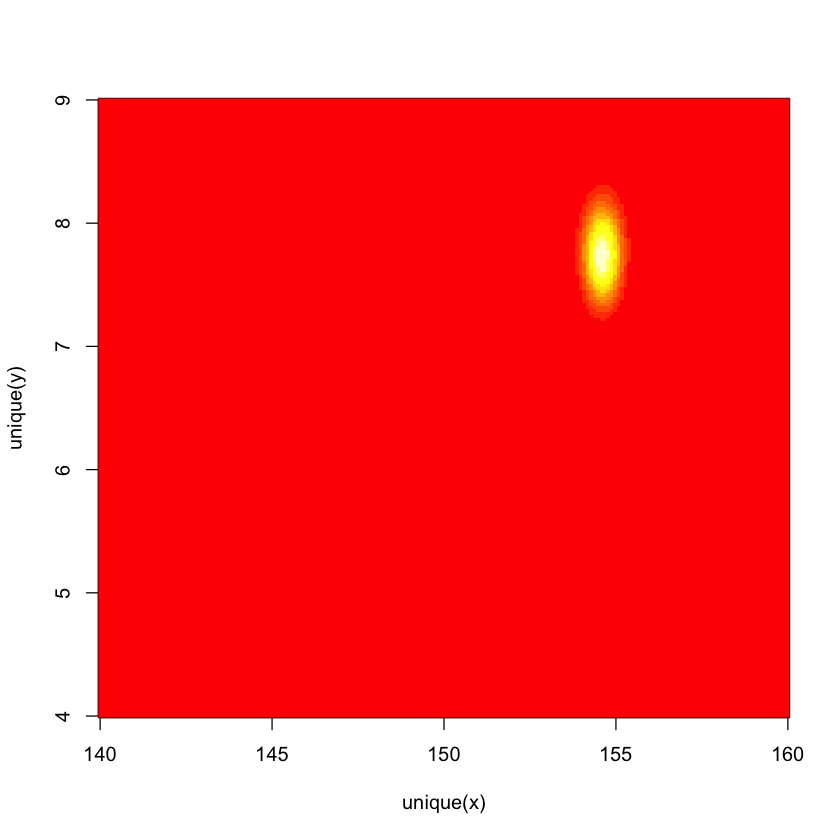

In [38]:
image_xyz(post$mu, post$sigma, post$prob)